In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Just a simple convenience function to send the internal python
# logs to stdout.  Definitely not required
from whylogs.logs import display_logging
display_logging('debug')

2021-08-23 11:30:49,509 - whylogs.logs - DEBUG - whylogs.logs logging -> stdout at level DEBUG


## Load data

In [3]:
# Load some data
df = pd.read_csv('data/lending_club_1000.csv')
# Split into a test & training set
df_training = df.sample(int(len(df) * 0.8), replace=False, random_state=123)
df_test = df.drop(df_training.index)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,90671227,NaN,4800.0,4800.0,4800.0,36 months,13.49,162.87,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,90060135,NaN,21600.0,21600.0,21600.0,60 months,9.49,453.54,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,90501423,NaN,24200.0,24200.0,24200.0,36 months,9.49,775.09,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,90186302,NaN,3600.0,3600.0,3600.0,36 months,11.49,118.70,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,90805192,NaN,8000.0,8000.0,8000.0,36 months,10.49,259.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Log dataset sketches

In [4]:
from whylogs.app.config import load_config
from whylogs.app.session import session_from_config
config = load_config(".whylogs_local.yaml")
session = session_from_config(config)


#### Log dataframe

In [5]:
session.log_dataframe(df_training, 'training.data')
# Then you could do whatever training or calculations you'd like

### Inspect profiles/statistics

In [6]:
# You can also capture the logger response and interact with the generated
# profiles

# Log the test data
prof = session.log_dataframe(df_test, 'test.data')
summary = prof.flat_summary()
stats_df = summary['summary']
stats_df

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,stddev_token_length,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,mths_since_recent_bc,200.0,2.0,0.0,198.0,203.0,21.828283,0.0,31.008445,62.0,...,0.0,0.000000,0.000000,1.000000,4.000000,11.000000,24.000000,95.000000,199.0,203.000000
1,delinq_amnt,200.0,1.0,0.0,199.0,71.0,0.582915,0.0,5.945197,3.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.0,71.000000
2,open_il_24m,200.0,1.0,0.0,199.0,7.0,1.688442,0.0,1.522032,8.0,...,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,5.000000,7.0,7.000000
3,mo_sin_rcnt_rev_tl_op,200.0,1.0,0.0,199.0,117.0,11.045226,0.0,15.940323,39.0,...,0.0,0.000000,0.000000,1.000000,3.000000,6.000000,13.000000,33.000000,101.0,117.000000
4,total_il_high_credit_limit,200.0,1.0,0.0,199.0,246410.0,50187.663317,0.0,46879.476575,184.0,...,0.0,0.000000,0.000000,0.000000,17172.000000,35651.000000,71646.000000,136549.000000,238030.0,246410.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,out_prncp,200.0,1.0,0.0,199.0,24210.7,2836.579447,0.0,5491.394127,76.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2608.169922,14532.700195,24021.0,24210.699219
147,open_rv_12m,200.0,1.0,0.0,199.0,12.0,1.728643,0.0,1.777165,10.0,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,9.0,12.000000
148,revol_bal_joint,200.0,200.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,pct_tl_nvr_dlq,200.0,1.0,0.0,199.0,100.0,93.728141,36.7,9.251176,69.0,...,0.0,36.700001,59.099998,73.300003,90.900002,96.699997,100.000000,100.000000,100.0,100.000000


<BarContainer object of 30 artists>

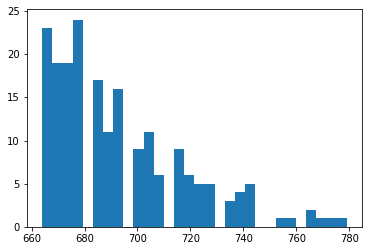

In [7]:
# See one of the inspected histograms
hist_data = summary['hist']['fico_range_high']
bins = hist_data['bin_edges']
n = hist_data['counts']
bin_width = np.diff(bins)

plt.bar(bins[0:-1], n, bin_width, align='edge')

## Load logged data

In [8]:
import glob

### Load flat table statistics

In [9]:
# Load the flat table statistics from the 'test.data' dataset
fnames = glob.glob('whylogs-output/test.data/dataset_summary/flat_table/dataset_summary*.csv')
fnames.sort()
# Load the most recent file
test_stats = pd.read_csv(fnames[-1])
test_stats

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,stddev_token_length,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,chargeoff_within_12_mths,200.0,1.0,0.0,199.0,1.00,0.015075,0.00,0.122160,2.0,...,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,1.000000,1.000000
1,addr_state,200.0,1.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,num_tl_op_past_12m,200.0,1.0,0.0,199.0,14.00,2.582915,0.00,2.003005,10.0,...,0.0,0.000000,0.000000,0.000000,1.00,2.0,4.000000,6.000000,10.000000,14.000000
3,recoveries,200.0,1.0,0.0,199.0,12366.60,227.226533,0.00,1175.933995,19.0,...,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,1301.760010,7378.200195,12366.599609
4,settlement_date,200.0,194.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,total_rev_hi_lim,200.0,1.0,0.0,199.0,207500.00,36145.226131,0.00,32822.451940,167.0,...,0.0,0.000000,1000.000000,6300.000000,15200.00,25900.0,44800.000000,107800.000000,177300.000000,207500.000000
147,installment,200.0,1.0,0.0,199.0,1300.55,486.018090,34.96,283.607183,180.0,...,0.0,34.959999,36.150002,112.139999,271.75,413.0,668.859985,1069.439941,1204.569946,1300.550049
148,open_acc_6m,200.0,1.0,0.0,199.0,8.00,1.356784,0.00,1.420749,8.0,...,0.0,0.000000,0.000000,0.000000,0.00,1.0,2.000000,4.000000,7.000000,8.000000
149,hardship_status,200.0,198.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load the full dataset profile sketch

In [10]:
from whylogs import DatasetProfile

# Load a dataset profile from the 'test.data' dataset
fnames = glob.glob('whylogs-output/test.data/dataset_profile/protobuf/*.bin')
fnames.sort()

test_prof = DatasetProfile.read_protobuf(fnames[-1], delimited_file=True)
test_prof

---

In [11]:
# Not necessary, but you can reset the WhyLogs session if you want
from whylogs import reset_default_session
reset_default_session()

2021-08-23 11:31:03,286 - whylogs.app.config - DEBUG - Attempting to load config file: None
2021-08-23 11:31:03,287 - whylogs.app.config - DEBUG - Attempting to load config file: .whylogs.yaml


### Load the json file data

In [12]:
import json
fnames = glob.glob('whylogs-output/test.data/dataset_summary/json/*.json')
fnames.sort()

test_json_summary = json.loads(open(fnames[-1],'r').read())
test_json_summary

{'properties': {'schemaMajorVersion': 1,
  'schemaMinorVersion': 1,
  'sessionId': '88e81dc7-98aa-45f2-9484-501edd3f0a3e',
  'sessionTimestamp': '1629718251857',
  'tags': {'name': 'test.data'},
  'dataTimestamp': '0',
  'metadata': {}},
 'columns': {'total_bc_limit': {'counters': {'count': '200', 'nullCount': '1'},
   'schema': {'inferredType': {'type': 'FRACTIONAL', 'ratio': 1.0},
    'typeCounts': {'FRACTIONAL': '199', 'NULL': '1'}},
   'numberSummary': {'count': '199',
    'max': 170100.0,
    'mean': 23209.040201005024,
    'stddev': 23430.080805535672,
    'histogram': {'end': 170100.01701,
     'counts': ['31',
      '46',
      '34',
      '18',
      '17',
      '8',
      '8',
      '7',
      '9',
      '6',
      '2',
      '3',
      '2',
      '1',
      '3',
      '0',
      '1',
      '1',
      '0',
      '0',
      '0',
      '1',
      '0',
      '0',
      '0',
      '0',
      '0',
      '0',
      '0',
      '1'],
     'max': 170100.0,
     'bins': [0.0,
      567